<font color='red' size='+4'><b>Image classification</b></font>


In [1]:
import seaborn as sns
from matplotlib import pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = ImageDataGenerator(rescale=1./255,
                           preprocessing_function=preprocess_input)

valid = ImageDataGenerator(rescale=1./255,
                           preprocessing_function=preprocess_input)

80% of our dataset will be used to train the various models explored, while the remaining 20% will serve as a validation set

In [ ]:
# Training set
train_set = train.flow_from_directory('/content/drive/MyDrive/Image Classification/train_valid_split/train',
                                      class_mode = 'categorical',
                                      seed=2222, target_size=(224, 224))

Found 3499 images belonging to 22 classes.


In [ ]:
# Validation set
valid_set = valid.flow_from_directory('/content/drive/MyDrive/Image Classification/train_valid_split/val',
                                      class_mode = 'categorical',
                                      seed=2222, target_size=(224, 224))

Found 885 images belonging to 22 classes.


<font color='purple' size='+3'><b>Baseline model</b></font>


#### To begin with, we're starting off with a relatively simple model architecture: 3 convolutional layers with 32, 64, and 128 filters respectively, all of which are 2x2 in size. The ReLU function is the activation function for the convolutional layers and the softmax function is the activation function for the output layer.

In [ ]:
model_null= Sequential()

model_null.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model_null.add(MaxPooling2D(2,2))

model_null.add(Conv2D(64,(3,3),activation='relu'))
model_null.add(MaxPooling2D(2,2))

model_null.add(Conv2D(128,(3,3),activation='relu'))
model_null.add(MaxPooling2D(2,2))

model_null.add(Flatten())

model_null.add(Dense(256, activation='relu'))

model_null.add(Dense(22, activation='softmax'))

In [ ]:
cb = EarlyStopping(monitor='loss', patience=5)
model_null.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
his_null = model_null.fit(train_set, epochs = 10, validation_data = valid_set, callbacks = [cb])

Epoch 1/10
110/110 [==============================] - 2227s 20s/step - loss: 1.7535 - accuracy: 0.4536 - val_loss: 1.0570 - val_accuracy: 0.6576
Epoch 2/10
110/110 [==============================] - 1051s 10s/step - loss: 0.8021 - accuracy: 0.7482 - val_loss: 0.7621 - val_accuracy: 0.7401
Epoch 3/10
110/110 [==============================] - 1098s 10s/step - loss: 0.4313 - accuracy: 0.8574 - val_loss: 0.6659 - val_accuracy: 0.7864
Epoch 4/10
110/110 [==============================] - 1122s 10s/step - loss: 0.2912 - accuracy: 0.9060 - val_loss: 0.5773 - val_accuracy: 0.8294
Epoch 5/10
110/110 [==============================] - 1061s 10s/step - loss: 0.1493 - accuracy: 0.9514 - val_loss: 0.6204 - val_accuracy: 0.8429
Epoch 6/10
110/110 [==============================] - 1086s 10s/step - loss: 0.1027 - accuracy: 0.9646 - val_loss: 0.7730 - val_accuracy: 0.8203
Epoch 7/10
110/110 [==============================] - 1150s 10s/step - loss: 0.1212 - accuracy: 0.9637 - val_loss: 0.7594 - val_ac

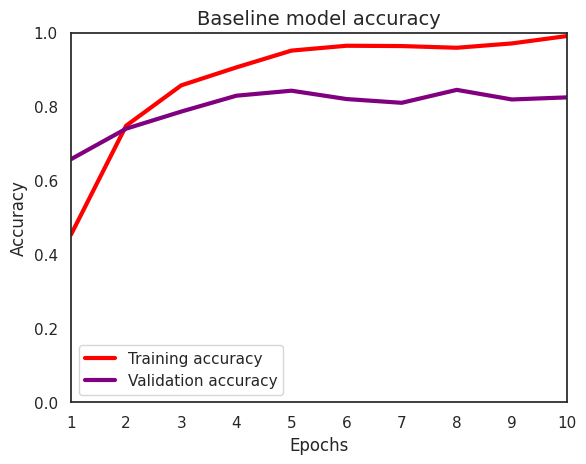

In [ ]:
sns.set_style('white')
sns.lineplot(x=range(1, len(his_null.history['accuracy']) + 1), y=his_null.history['accuracy'],
             label='Training accuracy', linewidth=3, color = 'red')
sns.lineplot(x=range(1, len(his_null.history['val_accuracy']) + 1), y=his_null.history['val_accuracy'],
             label='Validation accuracy', linewidth=3, color = 'purple')
plt.title("Baseline model accuracy", fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.xlim(1, len(his_null.history['accuracy']))
plt.ylim(0, 1)
plt.legend()
plt.show()

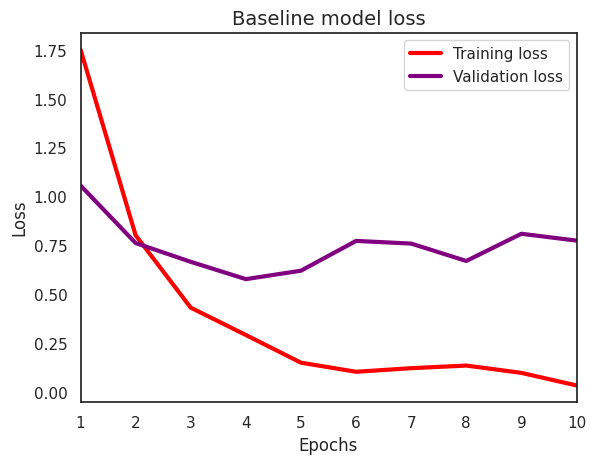

In [ ]:
sns.set_style('white')
sns.lineplot(x=range(1, len(his_null.history['loss']) + 1), y=his_null.history['loss'],
             label='Training loss', linewidth=3, color = 'red')
sns.lineplot(x=range(1, len(his_null.history['val_loss']) + 1), y=his_null.history['val_loss'],
             label='Validation loss', linewidth=3, color = 'purple')
plt.title("Baseline model loss", fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.xlim(1, len(his_null.history['loss']))
plt.legend()
plt.show()

#### From the 5th epoch onwards, the accuracy rate of our model on the validation set fluctuated between 81 and 84%. This score is quite acceptable considering the high number of classes of our dataset and its relatively small size. However, the noticeable performance gap between the training and validation phases is concerning and is a classic symptom of overfitting problems. The accuracy rate on the training set even reached 99% towards the end of the learning phase while the validation accuracy rate remained around 82.5%.

<font color='purple' size='+3'><b>Data augmentation</b></font>

#### There are several techniques available to address overfitting issues, and a popular one is data augmentation. This technique enhances the model's generalization capacity by introducing variations to existing images through random transformations such as flips, rotations, zooming ... In the following section, the effect of applying data augmentation techniques on the validation performance of our baseline model will be analyzed.

In [2]:
train_aug = ImageDataGenerator(rescale=1./255,
                               preprocessing_function=preprocess_input,
                               rotation_range = 60,
                               horizontal_flip = True,
                               zoom_range = 0.3)

valid_aug = ImageDataGenerator(rescale=1./255,
                               preprocessing_function=preprocess_input)

In [3]:
# Training set
train_set_aug = train_aug.flow_from_directory('/content/drive/MyDrive/Image Classification/train_valid_split/train',
                                              class_mode = 'categorical',
                                              seed=2222, target_size=(224, 224))

Found 3499 images belonging to 22 classes.


In [4]:
# Validation set
valid_set_aug = valid_aug.flow_from_directory('/content/drive/MyDrive/Image Classification/train_valid_split/val',
                                              class_mode = 'categorical',
                                              seed=2222, target_size=(224, 224))

Found 885 images belonging to 22 classes.


In [ ]:
model_null_aug = Sequential()

model_null_aug.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model_null_aug.add(MaxPooling2D(2,2))

model_null_aug.add(Conv2D(64,(3,3),activation='relu'))
model_null_aug.add(MaxPooling2D(2,2))

model_null_aug.add(Conv2D(128,(3,3),activation='relu'))
model_null_aug.add(MaxPooling2D(2,2))

model_null_aug.add(Flatten())

model_null_aug.add(Dense(256, activation='relu'))

model_null_aug.add(Dense(22, activation='softmax'))

In [ ]:
cb = EarlyStopping(monitor='loss', patience=5)
model_null_aug.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
his_null_aug = model_null_aug.fit(train_set_aug, epochs = 10,
                                  validation_data = valid_set_aug,
                                  callbacks = [cb])

Epoch 1/10
110/110 [==============================] - 1989s 18s/step - loss: 2.3202 - accuracy: 0.2744 - val_loss: 1.6096 - val_accuracy: 0.4655
Epoch 2/10
110/110 [==============================] - 638s 6s/step - loss: 1.4599 - accuracy: 0.5362 - val_loss: 1.3966 - val_accuracy: 0.5333
Epoch 3/10
110/110 [==============================] - 582s 5s/step - loss: 1.1195 - accuracy: 0.6442 - val_loss: 1.4079 - val_accuracy: 0.5379
Epoch 4/10
110/110 [==============================] - 587s 5s/step - loss: 0.9357 - accuracy: 0.6885 - val_loss: 0.8186 - val_accuracy: 0.7514
Epoch 5/10
110/110 [==============================] - 623s 6s/step - loss: 0.7605 - accuracy: 0.7462 - val_loss: 0.8143 - val_accuracy: 0.7356
Epoch 6/10
110/110 [==============================] - 655s 6s/step - loss: 0.6182 - accuracy: 0.7902 - val_loss: 0.8351 - val_accuracy: 0.7299
Epoch 7/10
110/110 [==============================] - 598s 5s/step - loss: 0.5544 - accuracy: 0.8065 - val_loss: 0.4935 - val_accuracy: 0.83

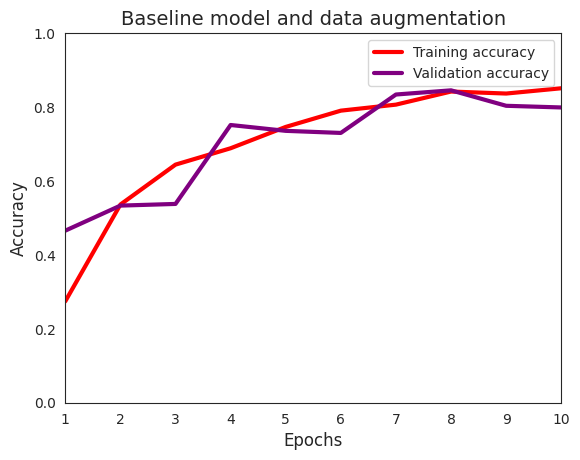

In [ ]:
# Accuracy
sns.set_style('white')
sns.lineplot(x=range(1, len(his_null_aug.history['accuracy']) + 1), y = his_null_aug.history['accuracy'],
             label='Training accuracy', linewidth=3, color = 'red')
sns.lineplot(x=range(1, len(his_null_aug.history['val_accuracy']) + 1), y = his_null_aug.history['val_accuracy'],
             label='Validation accuracy', linewidth=3, color = 'purple')
plt.title("Baseline model and data augmentation", fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.xlim(1, len(his_null_aug.history['accuracy']))
plt.ylim(0, 1)
plt.legend()
plt.show()

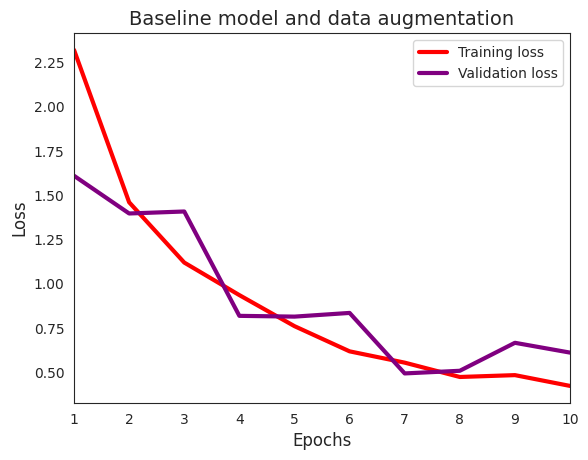

In [ ]:
# Loss
sns.set_style('white')
sns.lineplot(x=range(1, len(his_null_aug.history['loss']) + 1), y = his_null_aug.history['loss'],
             label='Training loss', linewidth=3, color = 'red')
sns.lineplot(x=range(1, len(his_null_aug.history['val_loss']) + 1), y = his_null_aug.history['val_loss'],
             label='Validation loss', linewidth=3, color = 'purple')
plt.title("Baseline model and data augmentation", fontsize=14)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.xlim(1, len(his_null_aug.history['loss']))
plt.legend()
plt.show()

#### Data augmentation technique has effectively mitigated the previously observed overfitting issue, the gap between training and validation performances is much more reasonable. However, despite these adjustments, the validation performance of our model did not significantly impoved. The accuray rate remains approximatively between 80 and 84%.

<font color='purple' size='+3'><b>Increasing the number of filters</b></font>

#### Another option that could potentially help increase the generalization capacity of our model is to modify its architecture, either by increasing the number of filters, adding convolutional layers, or testing different pooling strategies... In the following section, the effect of increasing the number of filters combined to data augmentation techniques will be analyzed. Adding more filters allows the model to learn more complex and abstract features from the input data. However, it's important to keep in mind that increasing the number of filters means increasing a model's complexity (more parameters to learn), which can lead to overfitting problemns especially with a small dataset like the one we are working with.

In [5]:
# New architecture
model_null2 = Sequential()

model_null2.add(Conv2D(40,(3,3),activation='relu',input_shape=(224,224,3)))
model_null2.add(MaxPooling2D(2,2))

model_null2.add(Conv2D(80,(3,3),activation='relu'))
model_null2.add(MaxPooling2D(2,2))

model_null2.add(Conv2D(160,(3,3),activation='relu'))
model_null2.add(MaxPooling2D(2,2))

model_null2.add(Flatten())

model_null2.add(Dense(320, activation='relu'))

model_null2.add(Dense(22, activation='softmax'))

In [6]:
cb = EarlyStopping(monitor='loss', patience=5)
model_null2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
his_null2 = model_null2.fit(train_set_aug, epochs = 10,
                            validation_data = valid_set_aug,
                            callbacks = [cb])

Epoch 1/10
110/110 [==============================] - 2904s 26s/step - loss: 2.3120 - accuracy: 0.2821 - val_loss: 1.5990 - val_accuracy: 0.4927
Epoch 2/10
110/110 [==============================] - 637s 6s/step - loss: 1.5130 - accuracy: 0.5199 - val_loss: 1.2532 - val_accuracy: 0.6169
Epoch 3/10
110/110 [==============================] - 614s 6s/step - loss: 1.1579 - accuracy: 0.6299 - val_loss: 0.9107 - val_accuracy: 0.7028
Epoch 4/10
110/110 [==============================] - 587s 5s/step - loss: 0.9698 - accuracy: 0.6816 - val_loss: 0.8330 - val_accuracy: 0.7141
Epoch 5/10
110/110 [==============================] - 631s 6s/step - loss: 0.8039 - accuracy: 0.7231 - val_loss: 0.7005 - val_accuracy: 0.7729
Epoch 6/10
110/110 [==============================] - 598s 5s/step - loss: 0.6456 - accuracy: 0.7877 - val_loss: 0.6748 - val_accuracy: 0.7955
Epoch 7/10
110/110 [==============================] - 594s 5s/step - loss: 0.5882 - accuracy: 0.8105 - val_loss: 0.9259 - val_accuracy: 0.70

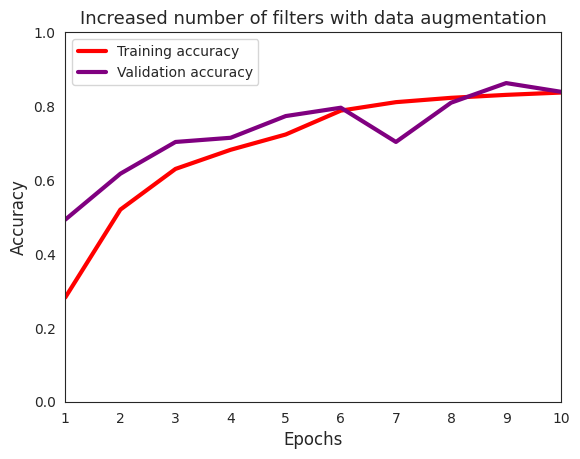

In [10]:
# Accuracy
sns.set_style('white')
sns.lineplot(x=range(1, len(his_null2.history['accuracy']) + 1), y = his_null2.history['accuracy'],
             label='Training accuracy', linewidth=3, color = 'red')
sns.lineplot(x=range(1, len(his_null2.history['val_accuracy']) + 1), y = his_null2.history['val_accuracy'],
             label='Validation accuracy', linewidth=3, color = 'purple')
plt.title("Increased number of filters with data augmentation", fontsize=13)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.xlim(1, len(his_null2.history['accuracy']))
plt.ylim(0, 1)
plt.legend()
plt.show()

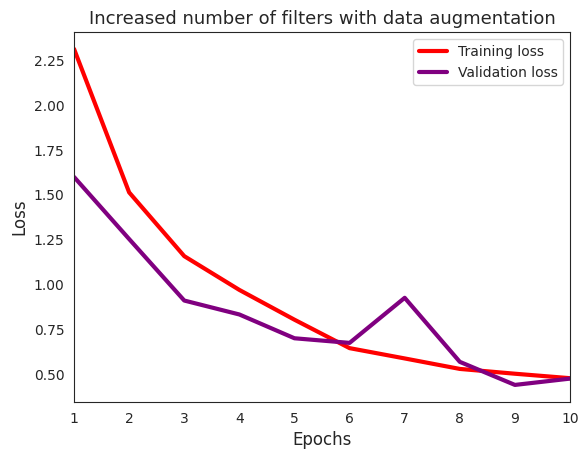

In [11]:
# Loss
sns.set_style('white')
sns.lineplot(x=range(1, len(his_null2.history['loss']) + 1), y = his_null2.history['loss'],
             label='Training loss', linewidth=3, color = 'red')
sns.lineplot(x=range(1, len(his_null2.history['val_loss']) + 1), y = his_null2.history['val_loss'],
             label='Validation loss', linewidth=3, color = 'purple')
plt.title("Increased number of filters with data augmentation", fontsize=13)
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.xlim(1, len(his_null2.history['loss']))
plt.legend()
plt.show()

#### As expected, considering the small size of our dataset, increasing the complexity of our model did not lead to a significant improvement in the validation performance. Worse still, this model took longer to train. The accuracy rate remains approximately between 80 and 84%. But at least, there is no problematic gap between training and validation performances. The next technique we will use to attempt to improve our model's performance is transfer learning.